# Loading all libraries

In [19]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset

In [20]:
df = pd.read_csv("lungcancer.csv")

# Preprocessing

# Removing duplicate values

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

# Encoding values in GENDER AND LUNG_CANCER columns

In [23]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['GENDER'])
df["GENDER_F"] = label_encoder.fit_transform(df["GENDER_F"])
df["GENDER_M"] = label_encoder.fit_transform(df["GENDER_M"])
df["F"] = df["GENDER_F"]
df["M"] = df["GENDER_M"]
df.drop(columns=["GENDER_F","GENDER_M"],inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    276 non-null    int64
 1   SMOKING                276 non-null    int64
 2   YELLOW_FINGERS         276 non-null    int64
 3   ANXIETY                276 non-null    int64
 4   PEER_PRESSURE          276 non-null    int64
 5   CHRONIC DISEASE        276 non-null    int64
 6   FATIGUE                276 non-null    int64
 7   ALLERGY                276 non-null    int64
 8   WHEEZING               276 non-null    int64
 9   ALCOHOL CONSUMING      276 non-null    int64
 10  COUGHING               276 non-null    int64
 11  SHORTNESS OF BREATH    276 non-null    int64
 12  SWALLOWING DIFFICULTY  276 non-null    int64
 13  CHEST PAIN             276 non-null    int64
 14  LUNG_CANCER            276 non-null    int32
 15  F                      276 non-null    int64


# Changing column positions

In [25]:
df = df[[ 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',  'M',  'F','LUNG_CANCER' ]]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,F,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)

# Perform Classification with normal splitting

In [39]:
logistic_regression = LogisticRegression(max_iter=5000)
svm = LinearSVC(max_iter=15000)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

logistic_regression_pred = logistic_regression.predict(X_test)
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)

log_acc = accuracy_score(y_test, logistic_regression_pred)
svm_acc = accuracy_score(y_test, svm_pred)
knn_acc = accuracy_score(y_test, knn_pred)
dt_acc = accuracy_score(y_test, decision_tree_pred)


print('Logistic Regression F1-Score',f1_score(y_test,logistic_regression_pred))
print('SVM F1-Score',f1_score(y_test,svm_pred))
print('KNN F1-Score',f1_score(y_test,knn_pred))
print('Decision Tree F1-Score',f1_score(y_test,decision_tree_pred))

print('Logistic Regression Precision',precision_score(y_test,logistic_regression_pred))
print('SVM Precision',precision_score(y_test,svm_pred))
print('KNN Precision',precision_score(y_test,knn_pred))
print('Decision Tree Precision',precision_score(y_test,decision_tree_pred))

print('Logistic Regression Recall',recall_score(y_test,logistic_regression_pred))
print('SVM Recall',recall_score(y_test,svm_pred))
print('KNN Recall',recall_score(y_test,knn_pred))
print('Decision Tree Recall',recall_score(y_test,decision_tree_pred))


print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))

print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))

print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division='warn'))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))



Logistic Regression F1-Score 0.9462365591397849
SVM F1-Score 0.9263157894736842
KNN F1-Score 0.888888888888889
Decision Tree F1-Score 0.9462365591397849
Logistic Regression Precision 0.8979591836734694
SVM Precision 0.8627450980392157
KNN Precision 0.8
Decision Tree Precision 0.8979591836734694
Logistic Regression Recall 1.0
SVM Recall 1.0
KNN Recall 1.0
Decision Tree Recall 1.0
Logistic Regression Accuracy:  0.9107142857142857
SVM Accuracy:  0.875
KNN Accuracy:  0.8035714285714286
Decision Tree Accuracy:  0.9107142857142857
Logistic Regression Confusion Matrix: 
 [[ 7  5]
 [ 0 44]]
SVM Confusion Matrix: 
 [[ 5  7]
 [ 0 44]]
KNN Confusion Matrix: 
 [[ 1 11]
 [ 0 44]]
Decision Tree Confusion Matrix: 
 [[ 7  5]
 [ 0 44]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro

C:\Users\Rohithk\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Using K-Fold and Stratified K-Fold splitting

In [28]:
def predict_output(algorithm, X_train, y_train, x_test, y_test):
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(x_test)
    return accuracy_score(y_test, y_pred).__round__(3)

In [29]:
def splitting_dataset(method,dataframe):
    X = pd.DataFrame(df.iloc[:, 0:len(df.columns) - 1])
    y = dataframe.iloc[:, len(df.columns) - 1]
    LogisticRegression_accuracy = []
    DecisionTree_accuracy = []
    SupportVectorMachine_accuracy = []
    KNearestNeighbors_accuracy = []
    
    for train_index, test_index in method.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        logistic_regression = LogisticRegression(max_iter=5000)
        LogisticRegression_accuracy.append(predict_output(logistic_regression, X_train, y_train, X_test, y_test))
        decision_tree = DecisionTreeClassifier()
        DecisionTree_accuracy.append(predict_output(decision_tree, X_train, y_train, X_test, y_test))
    
        support_vector_machine = LinearSVC(max_iter=10000, dual=False)
        SupportVectorMachine_accuracy.append(predict_output(support_vector_machine, X_train, y_train, X_test, y_test))
    
        knn = KNeighborsClassifier(n_neighbors=5)
        KNearestNeighbors_accuracy.append(predict_output(knn, X_train, y_train, X_test, y_test))
    

        
    print("Logistic Regression Accuracy: ", np.mean(LogisticRegression_accuracy))
    print("Decision Tree Accuracy: ", np.mean(DecisionTree_accuracy))
    print("Support Vector Machine Accuracy: ", np.mean(SupportVectorMachine_accuracy))
    print("K-Nearest Neighbors Accuracy: ", np.mean(KNearestNeighbors_accuracy))
    print("Max Accuracy of logistic regression", np.max(LogisticRegression_accuracy))
    print("Max Accuracy of decision tree", np.max(DecisionTree_accuracy))
    print("Max Accuracy of support vector machine", np.max(SupportVectorMachine_accuracy))
    print("Max Accuracy of k-nearest neighbors", np.max(KNearestNeighbors_accuracy))


In [30]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splitting_dataset(stratified_split,df)

Logistic Regression Accuracy:  0.9057999999999999
Decision Tree Accuracy:  0.8368
Support Vector Machine Accuracy:  0.9094000000000001
K-Nearest Neighbors Accuracy:  0.8661999999999999
Max Accuracy of logistic regression 0.911
Max Accuracy of decision tree 0.891
Max Accuracy of support vector machine 0.929
Max Accuracy of k-nearest neighbors 0.891


In [31]:
KFSplit = KFold(n_splits=5, shuffle=True, random_state=42)
splitting_dataset(KFSplit,df)

Logistic Regression Accuracy:  0.8984
Decision Tree Accuracy:  0.8695999999999999
Support Vector Machine Accuracy:  0.8876000000000002
K-Nearest Neighbors Accuracy:  0.859
Max Accuracy of logistic regression 0.945
Max Accuracy of decision tree 0.964
Max Accuracy of support vector machine 0.927
Max Accuracy of k-nearest neighbors 0.909


# Graphs


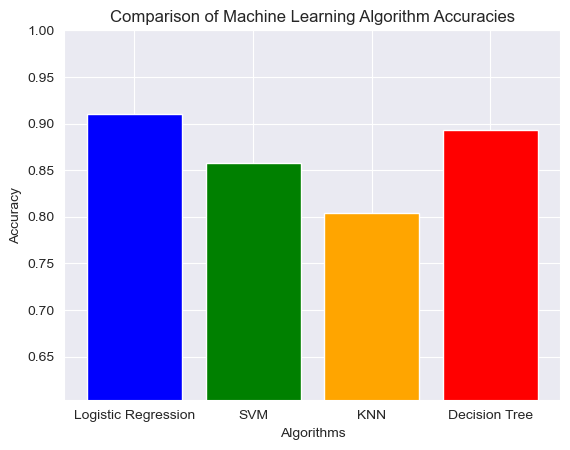

In [32]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) -0.2, 1.0) 
plt.show()


In [33]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(30,30))
# tree_rules = plot_tree(decision_tree,fontsize=10)
# print(tree_rules)


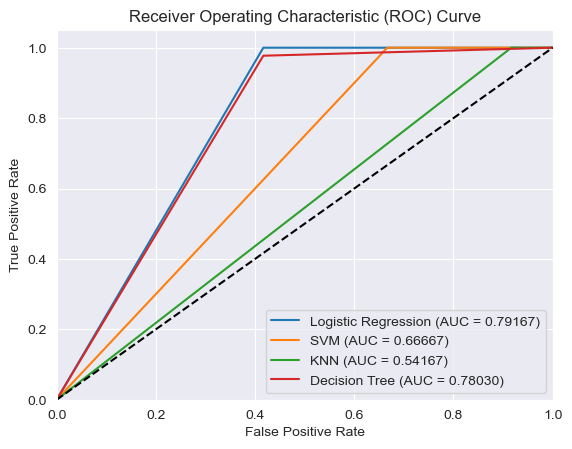

In [34]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm =  y_test
y_scores_svm = svm_pred

y_true_knn =  y_test
y_scores_knn = knn_pred

y_true_dt =  y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

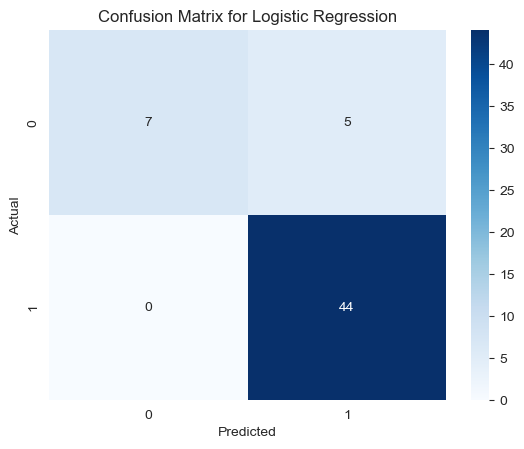

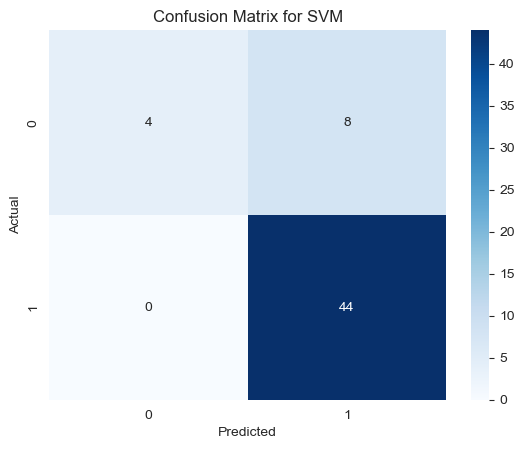

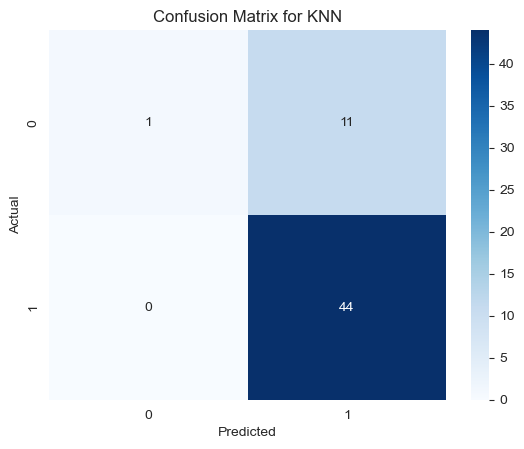

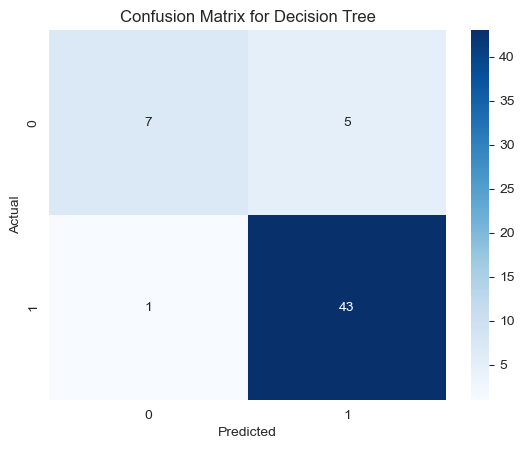

In [35]:
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
y_pred = {
    'Logistic Regression': logistic_regression_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Decision Tree': decision_tree_pred
}

# Create confusion matrix for each algorithm
for algorithm in algorithms:
    cm = confusion_matrix(y_test, y_pred[algorithm])
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.show()


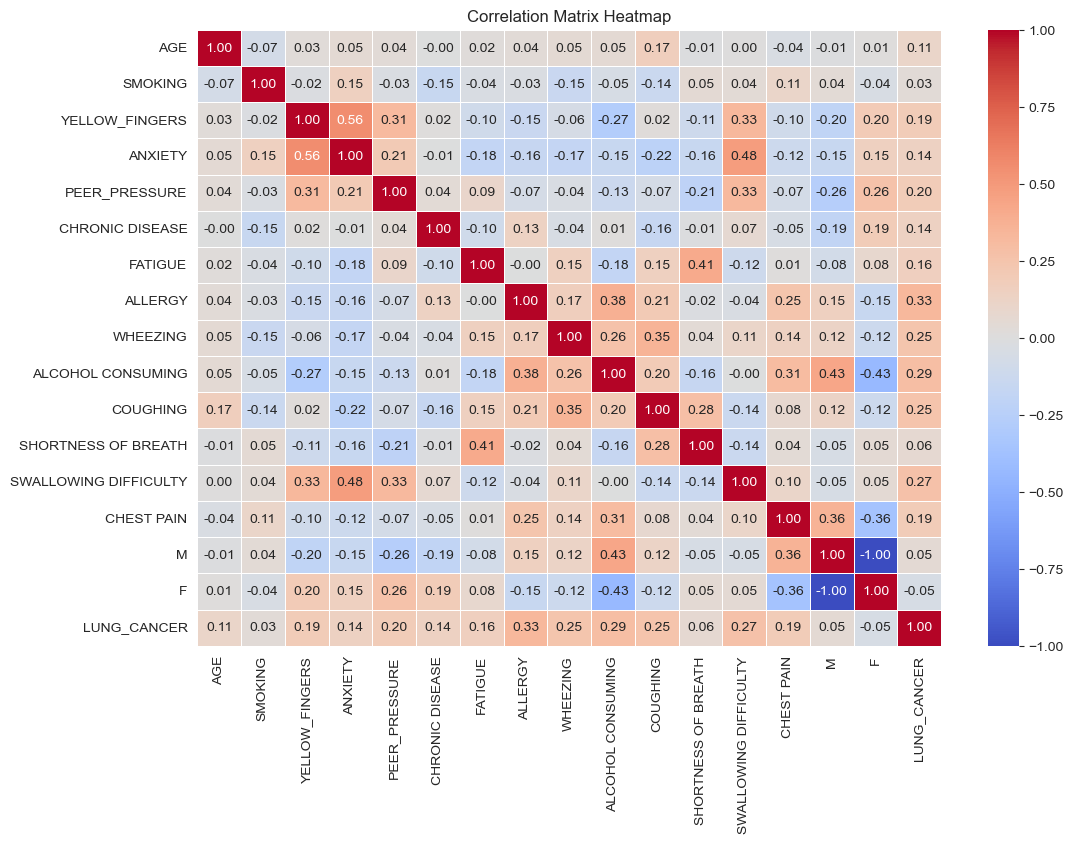

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()